# Aproksimacija
* https://pastebin.com/mVSeTF0f

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Psevdo inverz
glej prejšnja predavanja

## Polifit

In [8]:
#Koeficient trenja med gumo in asfaltom z silomerom, na gumi uteži (kot vlečenje klade) -> F_t = F_n * k_trenja

In [9]:
# Podatki 1)
F_n = np.array([5, 10, 15, 20, 25, 30]) # N
F_t = np.array([ 1.432,  2.365,  3.91 ,  5.166,  6.468,  7.438]) # N

In [18]:
koef = np.polyfit(F_n, F_t, 1) # 1 = linearno #pazi kaj je x in kaj y
koef #vrstni red = redi neodvisne spremenljivke - [... 4, 3, 2, 1, 0] -> y=kx+n -> [k, n]

array([ 0.24911429,  0.10366667])

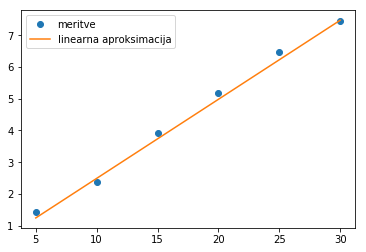

In [16]:
plt.plot(F_n, F_t, 'o', label='meritve') #naklon linearne aproksimacije = koef. trenja
plt.plot(F_n, F_n*koef[0], label='linearna aproksimacija') #n zanemarimo
plt.legend();

## Metoda najmajših kvadratov
* polifit uporablja to

In [19]:
x = F_n
y = F_t

In [24]:
A = np.array([[np.sum(x**2), np.sum(x)],
             [np.sum(x), len(x)]])
b = np.array([np.dot(y,x), np.sum(y)])

In [27]:
k, n = np.linalg.solve(A, b)
print(k, n) #isto kot polifit

0.249114285714 0.103666666667


## Polyfit

In [30]:
x = np.linspace(0, 5, 100)
y = 0.5*x**4 + 3*x**3 - 20*x**2 + 3*x + 10*np.random.randn(len(x))

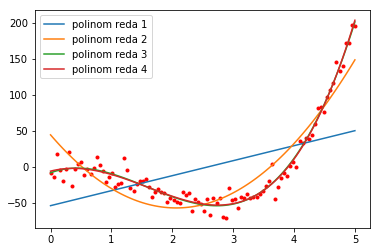

In [35]:
plt.plot(x, y, 'r.')
for i in range(1, 5):
    koef = np.polyfit(x, y, i)
    p = np.poly1d(koef)
    plt.plot(x, p(x), label=f'polinom reda {i}')
plt.legend();

In [32]:
#primerjamo napake
def napaki(y, y_apr): #y = podane, y_apr = aproksimirane
    S = np.sum((y_apr - y)**2)
    std = np.std(y_apr - y) #standardna deviacija, raztros
    return S, std

Napaka aproksimacije reda 1 je: (259897.6867626532, 50.980161510400613)
Napaka aproksimacije reda 2 je: (55345.370604143922, 23.525596826466256)
Napaka aproksimacije reda 3 je: (10750.14860269609, 10.368292338999749)
Napaka aproksimacije reda 4 je: (10677.606723973313, 10.33325056503195)
Napaka aproksimacije reda 5 je: (10674.521148027387, 10.33175742457564)
Napaka aproksimacije reda 6 je: (10621.941170115395, 10.306280206803711)
Napaka aproksimacije reda 7 je: (10520.264918530556, 10.256834267224248)
Napaka aproksimacije reda 8 je: (10506.482421230286, 10.250113375582869)
Napaka aproksimacije reda 9 je: (10493.208417757738, 10.243636277102842)


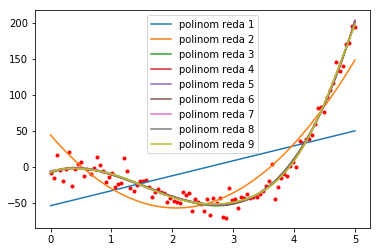

In [58]:
plt.plot(x, y, 'r.')
for i in range(1, 10): #med 4 in 10 skori ni več razlike - uzamemo najmanjšega, ki najboljše opiše naše podatke - npr. red 3
    koef = np.polyfit(x, y, i)
    p = np.poly1d(koef)
    plt.plot(x, p(x), label=f'polinom reda {i}')
    print(f'Napaka aproksimacije reda {i} je: {napaki(y, p(x))}')
plt.legend();

### Vprašanje 5
* model letala v vetrovniku

In [41]:
v = [6.184, 9.843, 15.582, 20.190, 23.509, 28.890, 34.753, 40.500, 45.979, 50.167] #hitrost toka
F_d = [0.029, 0.013, 0.072, 0.054, 0.135, 0.204, 0.300, 0.420, 0.513, 0.643] #zračni upor

In [43]:
# vemo kvadratni polinom: F_f = 0.005 * C_d * v**2 , C_d = koef. upora
# a_0*x**2 + a_1*x + a_2 = y -> x=v, y=F_d, a_0 = 0.005*C_d
#C_d določimo iz a_o

In [45]:
v = np.asarray(v) #najprej pretvorimo v numpy.array
F_d = np.asarray(F_d)

In [50]:
koef = np.polyfit(v, F_d, 2)
koef #razporejeni po redu spremenljivk

array([ 0.00029376, -0.00240019,  0.02091594])

In [51]:
C_d = koef[0]/0.005
C_d

0.058752959530327317

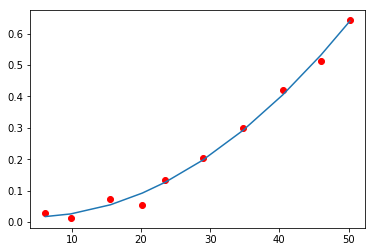

In [55]:
plt.plot(v, F_d, 'ro')
plt.plot(v, np.poly1d(koef)(v)); #lahko tudi v**2*koef[0] + v*koef[1]+ koef[2] #pobjekt tipa poly1d

### Vprašanje 6
* 3x ponovimo meritev

In [60]:
v_1 = [5.795, 9.901, 15.264, 20.96, 24.375, 31.376, 35.709, 38.889, 45.886, 50.193]
F_d_1 = [0.026, 0.046, 0.071, 0.116, 0.134, 0.235, 0.310, 0.387, 0.55, 0.615]
 
v_2 = [3.753, 8.984, 16.215, 18.565, 25.928, 30.444, 35.097, 41.090, 45.704, 51.824]
F_d_2 = [0.002, 0.025, 0.056, 0.104, 0.165, 0.237, 0.302, 0.409, 0.517, 0.666]
 
v_3 = [6.184, 9.843, 15.582, 20.190, 23.509, 28.890, 34.753, 40.500, 45.979, 50.167]
F_d_3 = [0.029, 0.013, 0.072, 0.054, 0.135, 0.204, 0.300, 0.420, 0.513, 0.643]

In [64]:
v = np.array(v_1 + v_2 + v_3) #navadne pythonove sezname lahko združujemo z seštevanjem
F_d = np.hstack((F_d_1, F_d_2, F_d_3)) #dela na np.arrayih, python seznamih... bolj univerzalno
#column_stack - združi stolpce (podobno)

In [68]:
koef = np. polyfit(v, F_d, 2)
C_d = koef[0]/0.005
C_d

0.05388448834645089

In [72]:
#če povprečimo za vsako meritev ne dobimo isto - boljše združit in na vsem skupaj zračunat
v_ji = [v_1, v_2, v_3]
Fd_ji = [F_d_1, F_d_2, F_d_3]
 
Cd_ji = []
for i in range(len(v_ji)):
    x = v_ji[i]
    y = Fd_ji[i]
    Cd_i = np.polyfit(x, y, deg=2)[0] / 0.005
    Cd_ji.append(Cd_i)
 
povprečni_C_d = np.mean(Cd_ji) #mean = povprečje
povprečni_C_d

0.054525506198428463

### Vprašanje 7

In [73]:
C_d

0.05388448834645089

In [76]:
v = np.array([6.184, 9.843, 15.582, 20.190, 23.509, 28.890, 34.753, 40.500, 45.979, 50.167])
F_d = np.array([0.029, 0.013, 0.072, 0.054, 0.135, 0.204, 0.300, 0.420, 0.513, 0.643])

array([ 0.00026942, -0.00127442,  0.01610637])

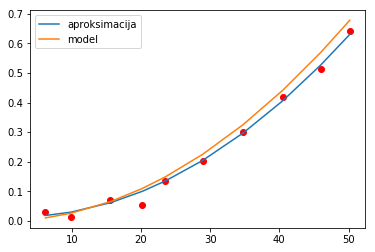

In [85]:
plt.plot(v, F_d, 'ro')
plt.plot(v, np.polyval(koef, v), label='aproksimacija') #polyval -> podobno poly1d -> vzame koef. in x-e
plt.plot(v, 0.005*C_d*v**2, label='model') #polinom je izračunal a_0, a_1, a_2 -> naš model samo a_0
plt.legend();
koef #C_d velja samo če uporabimo tudi a_1, a_2
#kako določimo tak C_d da bo pravi brez a_1, a_2? -> uporabimo curve_fit - predlagamo funkcijo

### Vprašanje 9

In [99]:
v = np.array([6.184, 9.843, 15.582, 20.190, 23.509, 28.890, 34.753, 40.500, 45.979, 50.167])
F_d = np.array([0.029, 0.013, 0.072, 0.054, 0.135, 0.204, 0.300, 0.420, 0.513, 0.643])

In [88]:
from scipy.optimize import curve_fit

In [100]:
def func(C_d, v): #moramo povedat s katero funkcijo aproksimiramo- katere parametre iščemo
    return 0.005*C_d*v**2

In [101]:
popt, pcov = curve_fit(func, v, F_d)

In [102]:
popt #optimalne vrednosti parametrov

array([ 1.40207612])

In [103]:
C_dnov = popt[0] #naš nov C_d - NAPAČEN

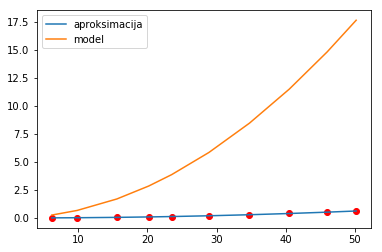

In [109]:
plt.plot(v, F_d, 'ro')
plt.plot(v, np.polyval(koef, v), label='aproksimacija')
plt.plot(v, 0.005*C_dnov*v**2, label='model')
plt.legend();

In [112]:
def func(v, C_d): #smo narobe drfinirali funkcijo - ker curve_fit drugače bere funkcijo!!! najprej podatek višjega reda v**2
    return 0.005*C_d*v**2

In [110]:
popt, pcov = curve_fit(func, v, F_d)
C_dnov = popt[0]
C_dnov

0.049915472090390621

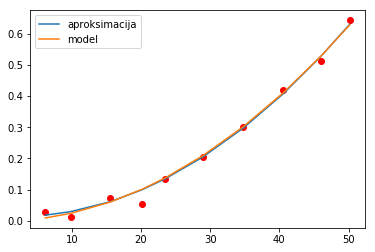

In [111]:
plt.plot(v, F_d, 'ro')
plt.plot(v, np.polyval(koef, v), label='aproksimacija')
plt.plot(v, 0.005*C_dnov*v**2, label='model')
plt.legend();

### Dodatek
* propeler

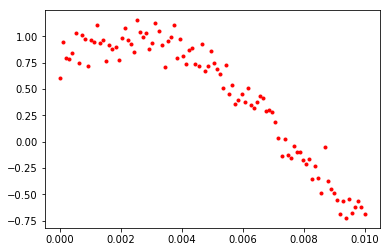

In [114]:
RPM = 3000
t = np.linspace(0, 0.01, 100)
y = np.sin(2*np.pi*t*RPM/60 + np.pi/4) + 0.1*np.random.randn(len(t))
plt.plot(t, y, 'r.')

In [118]:
def f(t, f, phi):
    return np.sin(2*np.pi*f*t + phi) #aproksimiramo z sinusom

In [119]:
koef, cov = curve_fit(f, t, y)
koef #zakaj -50Hz obratov na sekundo?

array([-49.32595969,   2.31317151])

In [122]:
koef, cov = curve_fit(f, t, y, p0=(30,0)) #vemo da bo pozitivna frekvenca npr. okoli 30 -> p0 -> pove kje naj iščem
koef #obstaja veliko rešitev

array([ 49.32596405,   0.82842102])